# Fuel Efficiency Assignment
## Adapted from TensorFlow Tutorials
Using the [Boston Housing jupyter notebook](Boston_Housing_Example.ipynb) as an example follow the prompts below to build a neural network to predict vehicle fuel efficiency.

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

/var/folders/cq/h9b2vxfd42sc_hkml7gp1d2m0000gn/T/ipykernel_19901/1226147920.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import keras
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import models
from keras import layers
from keras import backend


In [4]:
# Download the dataset
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

In [5]:
# Add labels to columns and view dataset
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [6]:
# Vehicle origin needs to be encoded to factors.  
origin = dataset.pop('Origin')
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [7]:
dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,0.625628,0.175879,0.198492
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.484569,0.381197,0.399367
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [8]:
# Remove missing data
dataset[dataset.isnull().any(axis=1)]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
32,25.0,4,98.0,NaN,2046.0,19.0,71,1.0,0.0,0.0
126,21.0,6,200.0,NaN,2875.0,17.0,74,1.0,0.0,0.0
330,40.9,4,85.0,NaN,1835.0,17.3,80,0.0,1.0,0.0
336,23.6,4,140.0,NaN,2905.0,14.3,80,1.0,0.0,0.0
354,34.5,4,100.0,NaN,2320.0,15.8,81,0.0,1.0,0.0
374,23.0,4,151.0,NaN,3035.0,20.5,82,1.0,0.0,0.0


#### New dataset with no null values:

In [9]:
df = dataset[dataset['Horsepower'].isnull() == False]
df.isnull().any()

MPG             False
Cylinders       False
Displacement    False
Horsepower      False
Weight          False
Acceleration    False
Model Year      False
USA             False
Europe          False
Japan           False
dtype: bool

In [10]:
# Split dataset into targets, y, and remove from the dataset.  We are predicting MPG (fuel efficiency)
# so the targets are MPG
y = df[['MPG']]
df.drop(columns='MPG',inplace = True)
df.head()

/var/folders/cq/h9b2vxfd42sc_hkml7gp1d2m0000gn/T/ipykernel_19901/2901484140.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='MPG',inplace = True)


,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,8,307.0,130.0,3504.0,12.0,70,1.0,0.0,0.0
1,8,350.0,165.0,3693.0,11.5,70,1.0,0.0,0.0
2,8,318.0,150.0,3436.0,11.0,70,1.0,0.0,0.0
3,8,304.0,150.0,3433.0,12.0,70,1.0,0.0,0.0
4,8,302.0,140.0,3449.0,10.5,70,1.0,0.0,0.0


In [11]:
y.head()

,MPG
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [12]:
# Split the dataset into X_train, X_test, y_train, y_test.  
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size= 0.2, random_state= 42 )

In [13]:
# Normalize the data by subtracting the mean from each feature and divide by one standard deviation
X_train_mean = X_train.mean(axis=0)
X_train -= X_train_mean

X_train_std = X_train.std(axis=0)
X_train /=X_train_std

X_test -= X_train_mean
X_test /= X_train_std

In [14]:
#check the dataset
print(X_train[:5])
print('--------------')
print(X_test[:5])


     Cylinders  Displacement  Horsepower    Weight  Acceleration  Model Year  \
260   0.304374      0.284123    0.141203  0.753596      1.119966    0.493737   
184  -0.871788     -0.535024   -0.328972 -0.492341     -0.228574   -0.057207   
174   0.304374     -0.236276   -0.198368 -0.002526     -0.370525   -0.332678   
64    1.480536      1.180365    1.186034  1.365865     -0.725404   -1.159094   
344  -0.871788     -1.055423   -1.060354 -1.320984      0.303744    1.320152   

          USA    Europe     Japan  
260  0.740101 -0.424916 -0.501193  
184  0.740101 -0.424916 -0.501193  
174  0.740101 -0.424916 -0.501193  
64   0.740101 -0.424916 -0.501193  
344  0.740101 -0.424916 -0.501193  
--------------
     Cylinders  Displacement  Horsepower    Weight  Acceleration  Model Year  \
79   -0.871788     -0.959052   -0.929750 -0.947679      0.871550   -1.159094   
276  -0.871788     -0.718127    0.271807 -0.227223      0.055329    0.493737   
248  -0.871788     -1.007237   -1.164837 -1.4101

In [15]:
# Built a sequential neural network model.  Start with backend.clear_session()
# Think about what activation function you will use, the input shape, number of nodes, and output shape and activation
backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(27, activation = 'linear', input_shape = (X_train.shape[1],)))
model.add(layers.Dense(27, activation = 'linear'))
model.add(layers.Dense(1))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# Compile the model.  Use 'rmsprop' optimizer.  Think about what loss function and metrics you need to use for a
# regression problem and add it below.
model.compile(optimizer = 'RMSprop', loss  = 'mse', metrics=['mae'])

In [17]:
# Fit the model.  Use 1000 epochs.  Add a validation split to your model.  Set verbose = 0.
x_train, x_valid, y_train_S, y_valid = train_test_split(X_train, y_train,test_size = 0.2,random_state = 42)

history = model.fit(x_train,
                   y_train_S,
                   epochs = 1000,
                   batch_size=16,
                   validation_data=(x_valid, y_valid),
                   verbose = 0)

In [18]:
# Use this bit of code to view the History output.
hist = pd.DataFrame(history.history)
display(hist)

,loss,mae,val_loss,val_mae
0,608.660645,23.506710,554.787903,22.914179
1,579.840759,23.277967,534.676453,22.662601
2,554.915527,22.978588,515.694336,22.355898
3,531.601135,22.591869,496.400696,21.982592
4,507.583862,22.136856,475.392975,21.523569
...,...,...,...,...
995,11.894317,2.676612,8.611905,2.283901
996,12.066943,2.692875,8.683449,2.276959
997,12.051823,2.695004,8.651521,2.258145
998,11.873938,2.675222,8.584146,2.256317


In [19]:
#Get the loss and MAE vs epochs
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['mae']
val_acc_values = history_dict['val_mae']
epochs = range(1, len(history_dict['mae']) + 1)

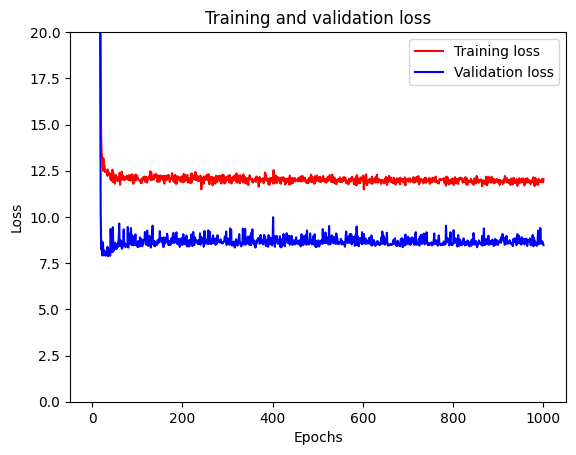

In [20]:
# Use the Boston Housing example to plot the validation and training loss vs epochs
plt.plot(epochs, loss_values, 'r', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.ylim(0,20)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

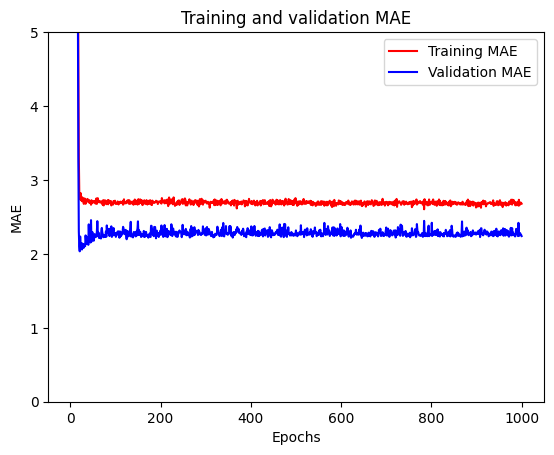

In [21]:
# Use the Boston Housing example to plot the validation and training mean absolute error vs epochs
plt.plot(epochs, acc_values, 'r', label = 'Training MAE')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation MAE')
plt.ylim(0,5)
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [22]:
# Evaluate the model on the test data and print the results
results = model.evaluate(X_test, y_test)
print(results)
print(model.metrics_names)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.7965 - mae: 2.3818 
[10.33967113494873, 2.437007188796997]
['loss', 'compile_metrics']


Build a new model and try to get the  accuracy as high as you can. Things to try: more hidden layers and hidden units, activation types, epochs, batch size, and validation_split. Try as many models as you like.  

Be sure to clear the session each time: `backend.clear_session()`. Copy your best model at the end of the notebook.

## Trail 1: two more layers, with 150 epochs

In [23]:
backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(9, activation = 'relu', input_shape = (X_train.shape[1],)))
model.add(layers.Dense(3, activation = 'relu'))
#model.add(layers.Dense(3, activation= 'relu'))
#model.add(layers.Dense(3, activation= 'relu'))
model.add(layers.Dense(3, activation= 'relu'))
model.add(layers.Dense(1))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.compile(optimizer = 'RMSprop', loss  = 'mse', metrics=['mae'])

In [25]:
history = model.fit(x_train,
                   y_train_S,
                   epochs = 200,
                   batch_size=16,
                   validation_data=(x_valid, y_valid),
                   verbose = 1)

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 640.0208 - mae: 23.7524 - val_loss: 563.1904 - val_mae: 22.6352
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 610.2232 - mae: 23.1795 - val_loss: 551.3566 - val_mae: 22.3210
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 620.4991 - mae: 23.2676 - val_loss: 538.4520 - val_mae: 21.9956
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 588.5163 - mae: 22.5454 - val_loss: 524.4542 - val_mae: 21.6535
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 568.1511 - mae: 21.9898 - val_loss: 508.8329 - val_mae: 21.2764
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 512.9151 - mae: 20.7752 - val_loss: 492.3646 - val_mae: 20.8714
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 534.7224 - mae: 21.4100 - val_loss: 474.8471 - val_mae: 20.4366
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 472.5614 - mae: 19.9300 - val_loss: 455.2081 - val_mae: 19.9462
Epoch 9/200
16/1

In [26]:
hist = pd.DataFrame(history.history)
display(hist)

,loss,mae,val_loss,val_mae
0,608.780457,23.179386,563.190430,22.635199
1,596.133118,22.845745,551.356628,22.321035
2,583.175415,22.504721,538.451965,21.995556
3,569.424988,22.166693,524.454163,21.653456
4,553.590942,21.788418,508.832855,21.276445
...,...,...,...,...
195,6.994576,1.926060,6.676149,2.000411
196,7.002640,1.930157,6.669095,2.006484
197,6.928818,1.923426,6.611224,1.994887
198,6.992338,1.940386,6.767414,2.031984


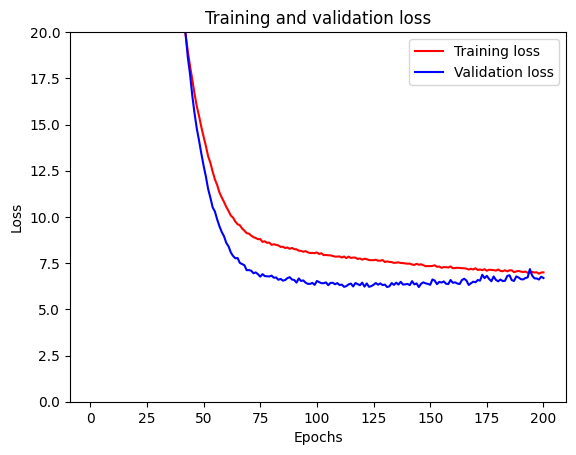

In [27]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['mae']
val_acc_values = history_dict['val_mae']
epochs = range(1, len(history_dict['mae']) + 1)
plt.plot(epochs, loss_values, 'r', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.ylim(0,20)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

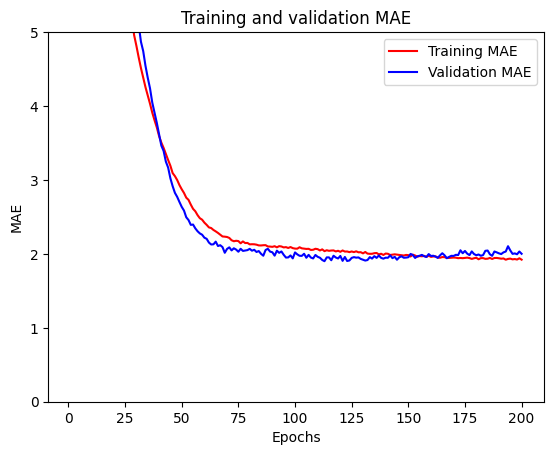

In [28]:
plt.plot(epochs, acc_values, 'r', label = 'Training MAE')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation MAE')
plt.ylim(0,5)
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [29]:
results = model.evaluate(X_test, y_test)
print(results)
print(model.metrics_names)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.5549 - mae: 1.9341
[7.1913628578186035, 1.9777389764785767]
['loss', 'compile_metrics']


## Trails
Trail 1: total of 5 layers(27,27,9,9,1)(linear), epochs = 150, batch_size = 16 -------- Test result : (loss = 9.9410  , mae = 2.3151 )     

Trail 2: total of 5 layers(27,27,9,9,1)(linear), epochs = 150, batch_size = 9 -------- Test result : (loss = 10.6523  , mae = 2.5342 )  

Trail 3: total of 5 layers(9,9,3,3,1)(linear), epochs = 150, batch_size = 16 -------- Test result : (loss = 9.2220  , mae = 2.2740 )     

Trail 4: total of 4 layers(9,9,3,1)(linear), epochs = 150, batch_size = 16 -------- Test result : (loss = 10.3415  , mae = 2.4974 ) 

Trail 5: total of 6 layers(9,9,3,3,3,1)(linear), epochs = 150, batch_size = 16 -------- Test result : (loss = 8.9592  , mae = 2.1791 )   

Trail 6: total of 7 layers(9,9,3,3,3,3,1)(linear), epochs = 150, batch_size = 16 -------- Test result : (loss = 10.7090  , mae = 2.5729 ) 

Trail 7: total of 6 layers(9,9,3,3,3,1)(linear), epochs = 150, batch_size = 27 -------- Test result : (loss = 15.1989  , mae = 3.1490 ) 

Trail 8: total of 6 layers(9,9,3,3,3,1)(linear), epochs = 250, batch_size = 27 -------- Test result : (loss = 9.6196  , mae = 2.3473 ) 

Trail 9: total of 6 layers(9,9,3,3,3,1)(relu), epochs = 250, batch_size = 16 -------- Test result : (loss = 6.1610  , mae = 1.8754 ) 

Trail 10: total of 4 layers(9,3,3,1)(relu), epochs = 250, batch_size = 16 -------- Test result : (loss = 5.5503 , mae = 1.6663 ) 






## Final Model

In [37]:
backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(9, activation = 'relu', input_shape = (X_train.shape[1],)))
#model.add(layers.Dense(9, activation = 'relu'))
#model.add(layers.Dense(3, activation= 'relu'))
model.add(layers.Dense(3, activation= 'relu'))
model.add(layers.Dense(3, activation= 'relu'))
model.add(layers.Dense(1))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.compile(optimizer = 'RMSprop', loss  = 'mse', metrics=['mae'])

In [39]:
history = model.fit(x_train,
                   y_train_S,
                   epochs = 150,
                   batch_size=16,
                   validation_data=(x_valid, y_valid),
                   verbose = 0)

In [40]:
hist = pd.DataFrame(history.history)
display(hist)

,loss,mae,val_loss,val_mae
0,626.802002,23.655079,581.220642,23.129902
1,621.864990,23.537329,576.519043,23.019926
2,616.742249,23.416584,571.406250,22.900023
3,611.047974,23.283009,565.760315,22.766884
4,604.659241,23.131502,559.304932,22.614735
...,...,...,...,...
145,6.564711,1.826061,6.096465,1.713304
146,6.579266,1.859057,6.128620,1.711442
147,6.654348,1.861228,6.033843,1.704432
148,6.535246,1.847981,6.242803,1.726225


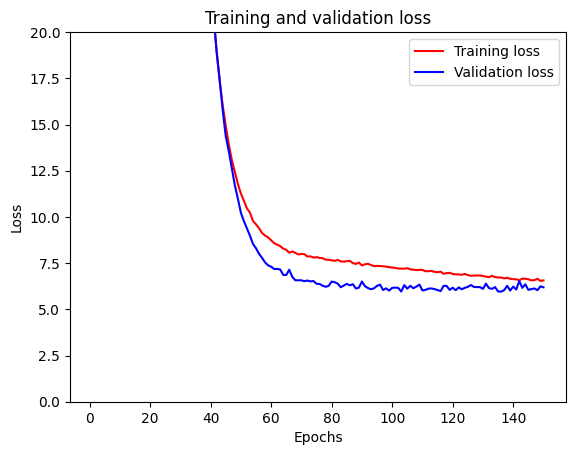

In [41]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['mae']
val_acc_values = history_dict['val_mae']
epochs = range(1, len(history_dict['mae']) + 1)
plt.plot(epochs, loss_values, 'r', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.ylim(0,20)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

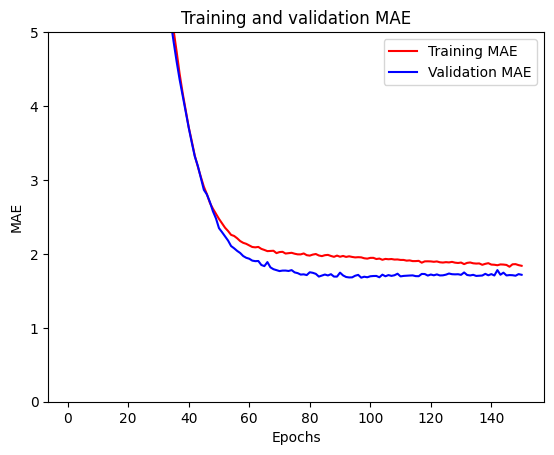

In [42]:
plt.plot(epochs, acc_values, 'r', label = 'Training MAE')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation MAE')
plt.ylim(0,5)
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [43]:
results = model.evaluate(X_test, y_test)
print(results)
print(model.metrics_names)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.7707 - mae: 1.8159 
[6.41727876663208, 1.8773401975631714]
['loss', 'compile_metrics']


## Conclusion:

The adding more layers does give the model a better score on loss and mae. However, when the layers pass a certain number, the effect starts to reduce. 

More epochs does not mean better accuracy. I learnt this during my project using YOLO v8. Sometimes it will overfit the model. However, we do need enough epochs to know its limit. 

In this assignment, less units works better. I find 993331 is the better combo for 'linear' activation during my testings and 9331 better for relu activations. These combination gives a best score as low as 1.6 when I first tried it. It does not give the same numbers every time I run it. 

Activiation does bring significantly different result to the test as I thought linear would do a better job since it is a regression problem. The result turns out to be that relu does a much better job for this question even with less layers.

Overall it was a fun experiment. I am currently learngin everything from scratch and trying to write out a nerual network using python. These questions I have is a good motivation to learn. 